# A description of the data 
The data as csv file downloaded from Kaggle. detailed descriptions are below.
•	Province/State - Province or state of the observation (Could be empty when missing)
•	Country/Region - Country of observation
•	Total confirmed Covid 19 cases from 1/22/2020 to 8/1/2020



# Import data

In [ ]:
import pandas as pd
import numpy as np
import folium # map rendering library
df=pd.read_csv("data.csv")

# Get Latitude & Longitude for various country :

In [ ]:
#Import required package for obtaining Latitude and Longitude of each cities
# Need to get Latitude & Longitude of Jakarta city and the districts
# Get API key from the service provider (Open Cage Geocode)
#!pip install opencage
from opencage.geocoder import OpenCageGeocode
key = 'xxxxxxxxxxxxx'
geocoder = OpenCageGeocode(key)
query = df["Country/Region"]  
results = geocoder.geocode(query)
df['lat'] = results[0]['geometry']['lat']
df['lng'] = results[0]['geometry']['lng']


# How it will be used to solve the problem:
If graph the total cases in various location around the word with clicking in each circle total number of cases can observe.

# Data Frame Analysis:

In [129]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,889,897,897,897,907,907,918,922,925,925
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,851,880,916,932,950,1000,1078,1109,1148,1164


In [128]:
df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,5.831288e+04,5.936989e+04,6.033058e+04,6.110163e+04,6.198372e+04,6.293235e+04,6.401938e+04,6.505984e+04,6.613522e+04,6.710467e+04
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,3.029832e+05,3.091674e+05,3.148280e+05,3.191810e+05,3.235822e+05,3.290138e+05,3.354734e+05,3.415332e+05,3.475803e+05,3.528725e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.565000e+02,2.565000e+02,2.635000e+02,2.637500e+02,2.667500e+02,2.667500e+02,2.667500e+02,2.715000e+02,2.715000e+02,2.715000e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.702000e+03,1.711500e+03,1.723000e+03,1.779000e+03,1.813000e+03,1.821500e+03,1.833000e+03,1.845000e+03,1.874500e+03,1.900000e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.545100e+04,1.601425e+04,1.635575e+04,1.643000e+04,1.682950e+04,1.702700e+04,1.723075e+04,1.771675e+04,1.838550e+04,1.912900e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,4.038816e+06,4.112531e+06,4.178970e+06,4.233923e+06,4.290337e+06,4.356206e+06,4.426982e+06,4.495015e+06,4.562038e+06,4.620444e+06


# Compare Number of Cases Feb Vs. August 2020

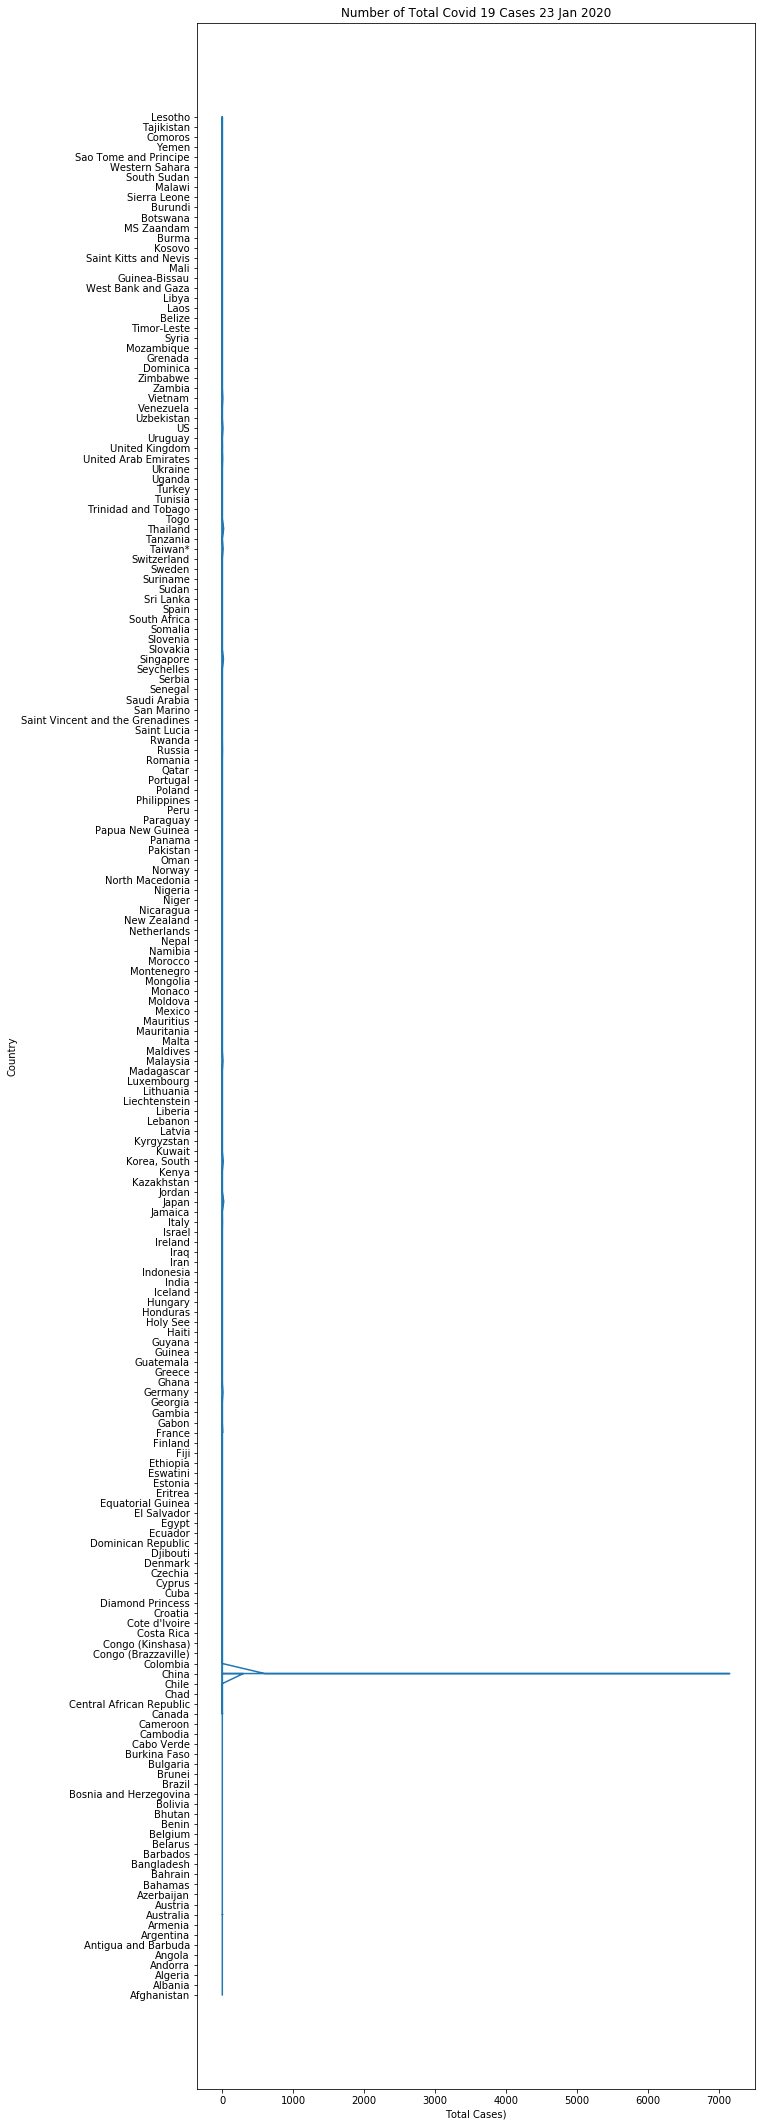

In [178]:
import matplotlib.pyplot as plt
x=df['2/1/20']
y=df['Country/Region']
#x=x.drop(columns=["Province/State","Country/Region","Lat","Long"])
plt.figure(figsize=(10,38))
plt.title("Number of Total Covid 19 Cases 23 Jan 2020")
plt.xlabel("Total Cases)")
plt.ylabel("Country")
d1=plt.plot(x,y)


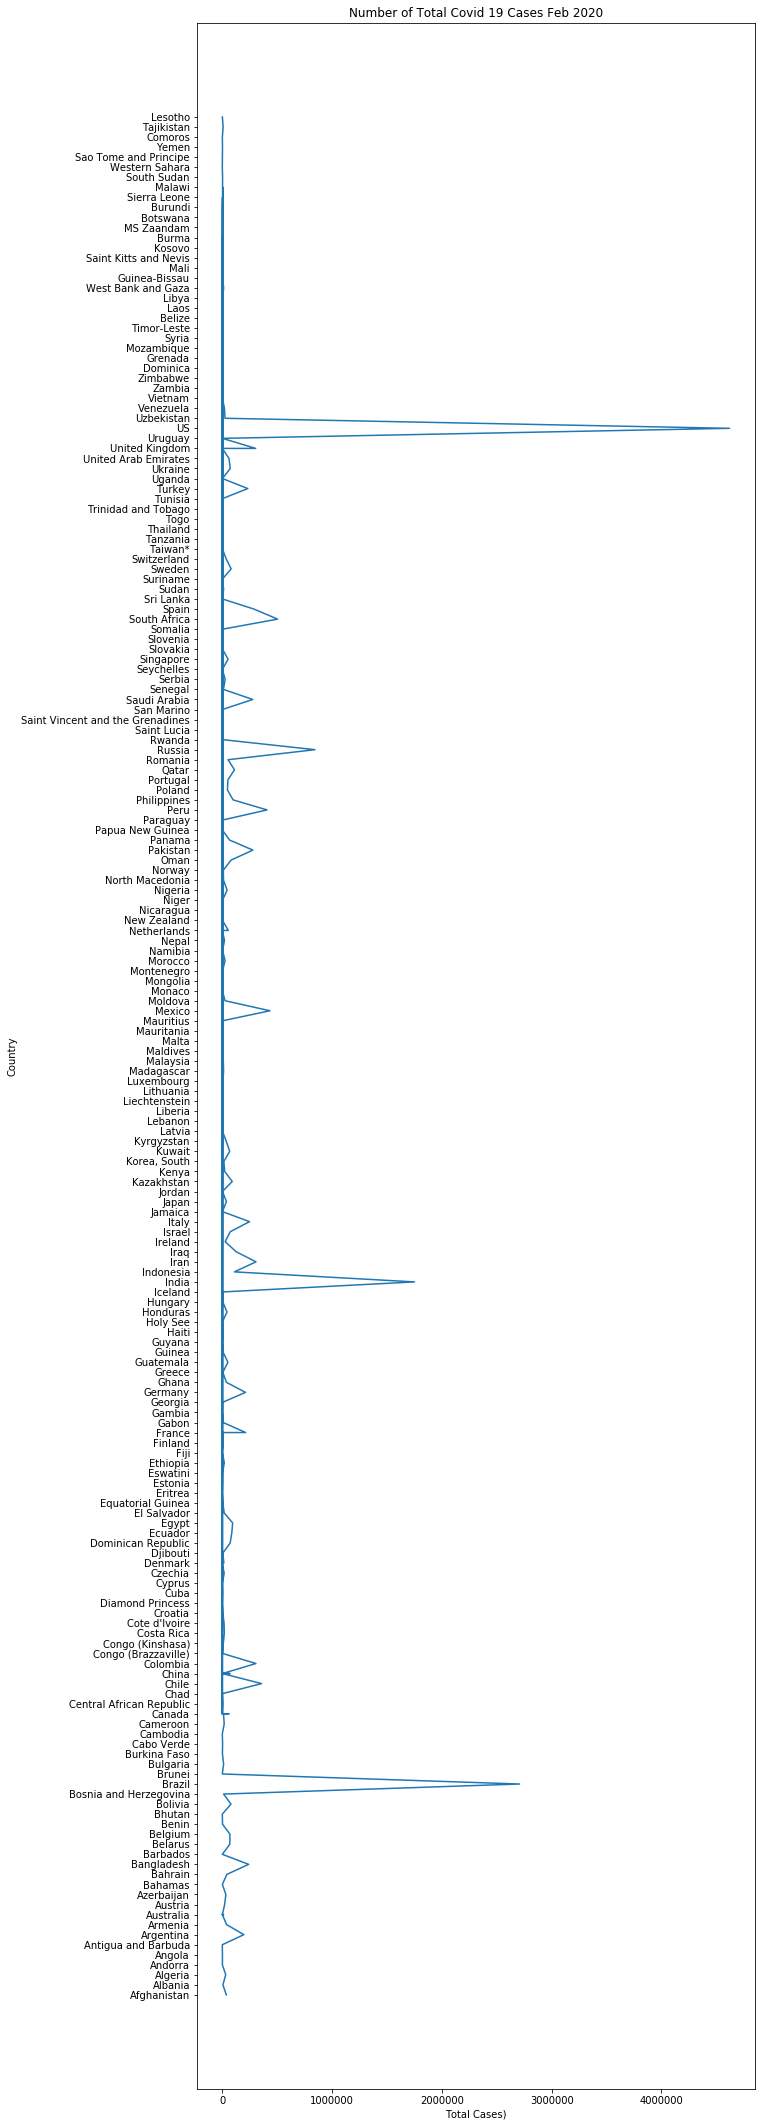

In [179]:
import matplotlib.pyplot as plt
x=df['8/1/20']
y=df['Country/Region']
#x=x.drop(columns=["Province/State","Country/Region","Lat","Long"])
plt.figure(figsize=(10,38))
plt.title("Number of Total Covid 19 Cases Feb 2020")
plt.xlabel("Total Cases)")
plt.ylabel("Country")
d2=plt.plot(x,y)

# Draw Folium Graph

In [100]:
import pandas as pd
import numpy as np
import folium # map rendering library
df=pd.read_csv("data.csv")
latitude = df['Lat'].mean()
longitude = df['Long'].mean()
map1= folium.Map(location=[latitude, longitude], zoom_start=3)
map1

In [117]:
for lat, lng, case, country,state in zip(
        df['Lat'], 
        df['Long'],df['8/1/20'],df['Country/Region'],df['Province/State'] ):
        label = '{},{},{}'.format(case,country,state)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map1)  


In [126]:
map1

In [182]:
map1.save('pic3.png')